<div style="font-size: 40px; text-align: center;"><b>Donor Choose Project EDA and Hypothesis Testing
<b></div><br><br>

<div style="font-size: 20px; text-align: justify;">DonorsChoose.org, a platform dedicated to funding classroom projects, faces significant challenges in efficiently and consistently vetting an increasing number of project proposals. With an anticipated influx of close to 500,000 proposals next year, the organization needs to address the following key issues:<br><br>

<ul><li>Scalability: How can DonorsChoose.org scale its current manual screening processes and resources to handle the projected volume of 500,000 project proposals, ensuring timely and efficient posting?<br><br>
<li>Consistency: How can DonorsChoose.org enhance the consistency of project vetting across a diverse group of volunteers to ensure a uniform and fair experience for all teachers submitting proposals?<br><br>
<li>Resource Allocation: How can DonorsChoose.org optimize the use of volunteer time by focusing their efforts on proposals that require the most assistance?</ul><br><br>
</div>

<div style="font-size: 20px; text-align: justify;">Dataset Description<br><br>

Train_data.csv:
<ul>
<li>id :- unique ID of the project application
<li>teacher_id :- ID of the teacher submitting the application
<li>teacher_prefix :- title of the teacher’s name (Ms., Mr., etc.)
<li>school_state :- US state of the teacher’s school
<li>project_submitted_datetime :- application submission timestamp
<li>project_grade_category :- school grade levels
<li>project_subject_categories :- category of the project (e.g., “Music & The Arts”)
<li>project_subject_subcategories :- sub-category of the project (e.g., “Visual Arts”)
<li>project_title :- title of the project
<li>project_essay_1 :- first essay*
<li>project_essay_2 :- second essay*
<li>project_essay_3 :- third essay*
<li>project_essay_4 :- fourth essay*
<li>project_resource_summary :- summary of the resources needed for the project
<li>teacher_number_of_previously_posted_projects :- number of previously posted applications by the submitting teacher
<li>project_is_approved :- whether DonorsChoose proposal was accepted (0=”rejected”, 1=”accepted”)</ul><br><br>

Resources.csv: contains information about the resources requested for each project.
<ul><li>id - unique resource id
<li>description - description of the resource 
<li>price - unit price of the resource
<li>quantity - number of a specific item requested by a teacher</ul>



<br><br>
</div>

<div style="font-size: 20px; text-align: justify;">1.Basic data cleaning and exploration.

<br><br>
<ul>a.Importing data and finding the shape.</ul><br><br>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/train_data.csv")
df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [2]:
df.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [3]:
df.shape

(109248, 17)

<div style="font-size: 20px; text-align: justify;"> <ul>The dataset has 109248 rows and 17 columns.  </ul>  <br><br>
Importing dataset resources<br><br>
</div>


In [4]:
res=pd.read_csv(r"/home/devipriya/Ammu/Scaler_project/DonorChooseFiles/resources.csv")
res.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [5]:
res.columns

Index(['id', 'description', 'quantity', 'price'], dtype='object')

In [6]:
res.shape

(1541272, 4)

<div style="font-size: 20px; text-align: justify;"> <ul>The dataset resources has 1541272 rows and 4 columns.  </ul>  </div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

<div style="font-size: 20px; text-align: justify;"> Dropping column Unnamed    <br><br>
</div>

In [8]:
df=df.drop('Unnamed: 0',axis=1)

<div style="font-size: 20px; text-align: justify;"> Converting column 'project_submitted_datetime' to datetime.<br><br>
</div>

In [9]:
df['project_submitted_datetime'] = pd.to_datetime(df['project_submitted_datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   id                                            109248 non-null  object        
 1   teacher_id                                    109248 non-null  object        
 2   teacher_prefix                                109245 non-null  object        
 3   school_state                                  109248 non-null  object        
 4   project_submitted_datetime                    109248 non-null  datetime64[ns]
 5   project_grade_category                        109248 non-null  object        
 6   project_subject_categories                    109248 non-null  object        
 7   project_subject_subcategories                 109248 non-null  object        
 8   project_title                                 109248 n

In [11]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


<div style="font-size: 20px; text-align: justify;"><br><br> b. Checking for null values.   <br><br>
</div>



In [12]:
df.isna().sum(axis=0)

id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [13]:
(df.isna().sum(axis=0)/len(df))*100

id                                               0.000000
teacher_id                                       0.000000
teacher_prefix                                   0.002746
school_state                                     0.000000
project_submitted_datetime                       0.000000
project_grade_category                           0.000000
project_subject_categories                       0.000000
project_subject_subcategories                    0.000000
project_title                                    0.000000
project_essay_1                                  0.000000
project_essay_2                                  0.000000
project_essay_3                                 96.560120
project_essay_4                                 96.560120
project_resource_summary                         0.000000
teacher_number_of_previously_posted_projects     0.000000
project_is_approved                              0.000000
dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br><ul>96% values of  columns 'project_essay_3' and 'project_essay_4' are missing. </ul>  <br><br>
</div>



In [14]:
res.isna().sum(axis=0)

id               0
description    292
quantity         0
price            0
dtype: int64

In [15]:
(res.isna().sum(axis=0)/len(res))*100

id             0.000000
description    0.018945
quantity       0.000000
price          0.000000
dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br><ul>0.018% values of  column 'description' is missing. </ul>  <br><br>
</div>



<div style="font-size: 20px; text-align: justify;"><br> c. Describing the dataset.   <br><br>
</div>



In [16]:
df.describe()

,project_submitted_datetime,teacher_number_of_previously_posted_projects,project_is_approved
count,109248,109248.000000,109248.000000
mean,2016-10-21 13:26:18.841278464,11.153165,0.848583
min,2016-04-27 00:27:36,0.000000,0.000000
25%,2016-08-10 19:47:21.500000,0.000000,1.000000
50%,2016-09-30 12:51:47.500000,2.000000,1.000000
75%,2017-01-11 00:08:39.249999872,9.000000,1.000000
max,2017-04-30 23:45:08,451.000000,1.000000
std,NaN,27.777154,0.358456


<div style="font-size: 20px; text-align: justify;"><ul><li>The projects in the dataset are submitted between the time period of 2016-04-27   to 2017-04-30 <br><br>
<li>Teachers have an average of 11 number of previously posted projects.


</ul><br><br>
</div>



In [17]:
df.describe(include=['object'])

,id,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary
count,109248,109248,109245,109248,109248,109248,109248,109248,109248,109248,3758,3758,109248
unique,109248,72168,5,51,4,51,401,100851,94319,108832,3755,3750,108324
top,p253737,fa2f220b537e8653fb48878ebb38044d,Mrs.,CA,Grades PreK-2,Literacy & Language,Literacy,Flexible Seating,As a teacher in a low-income/high poverty scho...,Students will be using Chromebooks to increase...,"Daily, students will check out their chrome bo...",Each year our students struggle to make adequa...,My students need electronic tablets to do all ...
freq,1,44,57269,15388,44225,23655,9486,234,32,15,2,2,48


<div style="font-size: 20px; text-align: justify;"><ul><li>Out of 51 school states, maximum number of projects are submitted by the students of state CA.<br><br>
<li>Highest number of projects come under the project category Literacy & Language and subcategory Literacy.<br><br>
<li>Project Grade category given to most students is Grades PreK-2.


</ul><br><br>
</div>



In [18]:
res.describe()

,quantity,price
count,1.541272e+06,1.541272e+06
mean,2.860509e+00,5.028398e+01
std,7.570345e+00,1.447326e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.900000e+00
50%,1.000000e+00,1.499000e+01
75%,2.000000e+00,3.980000e+01
max,8.000000e+02,9.999000e+03


In [19]:
res.describe(include=['object'])

,id,description
count,1541272,1540980
unique,260115,332928
top,p009778,Apple - iPad� mini 2 with Wi-Fi - 16GB - Space...
freq,100,3037


<br><br><div style="font-size: 20px; text-align: justify;">2 Deriving new columns.<br><br>
<ul>a. Creating columns approval status. 
<ul><br><br>


If project_is_approved is 1 , then status is 'Approved'. If the value is 0, then  'Not Approved'.</ul></ul>
</div>


In [20]:
df['Approval_Status']=df['project_is_approved'].apply(lambda x: 'Approved' if x==1 else ('Not Approved' if x==0 else x))
df['Approval_Status'].head()

0    Not Approved
1        Approved
2    Not Approved
3        Approved
4        Approved
Name: Approval_Status, dtype: object

In [21]:
df['Approval_Status'].describe(include=['object'])

count       109248
unique           2
top       Approved
freq         92706
Name: Approval_Status, dtype: object

<br><br><div style="font-size: 20px; text-align: justify;"><ul>Most projects are of status 'Approved'.</ul>
</div>


<br><br><div style="font-size: 20px; text-align: justify;">b.  Creating column 'Total Cost'.
<ul><br><br>The coloumn is derived by Multiplying quantity and price from resource table.</ul><br>
</div>


In [22]:
res['Total_Cost']=res['quantity']*res['price']
res['Total_Cost'].head()

0    149.00
1     44.85
2      8.45
3     27.18
4     74.85
Name: Total_Cost, dtype: float64

In [23]:
res['Total_Cost'].describe()

count    1.541272e+06
mean     9.195773e+01
std      2.363134e+02
min      0.000000e+00
25%      1.059000e+01
50%      2.542000e+01
75%      7.299000e+01
max      1.605594e+04
Name: Total_Cost, dtype: float64

<br><br><div style="font-size: 20px; text-align: justify;">c.  Creating datetime columns.
<br><br>
</div>


In [24]:
df['year_of_submission'] = df['project_submitted_datetime'].dt.year
df['month_of_submission'] = df['project_submitted_datetime'].dt.strftime('%B')  
df['day_of_week'] = df['project_submitted_datetime'].dt.strftime('%A')
df['week_of_submission'] = df['project_submitted_datetime'].dt.isocalendar().week


In [25]:
df[['year_of_submission','week_of_submission']].astype('str').describe(include=['object'])

,year_of_submission,week_of_submission
count,109248,109248
unique,2,52
top,2016,31
freq,78966,5857


In [26]:
df[['month_of_submission','day_of_week']].describe(include=['object'])

,month_of_submission,day_of_week
count,109248,109248
unique,12,7
top,August,Wednesday
freq,19980,19219


<br><br><div style="font-size: 20px; text-align: justify;"><ul>Most projects from the dataset were submitted in the year 2016 and predominently in August.
</ul><br><br>
</div>


<br><br><div style="font-size: 20px; text-align: justify;">3.  Column analysis.<br><br>
<ul><br>a. Column approval status. <br><br>
</ul>
</div>


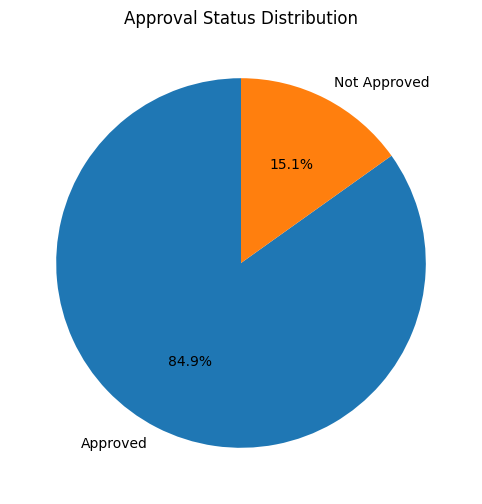

In [27]:
plt.figure(figsize=(8,6))
approval_counts = df['Approval_Status'].value_counts()


plt.pie(x=approval_counts, labels=approval_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Approval Status Distribution')
plt.show()


<div style="font-size: 20px; text-align: justify;"><ul><br><br>84% of Projects in the dataset are Approved.</ul>

<br><br>
</div>

<div style="font-size: 20px; text-align: justify;">b. Column project_submitted_datetime

<br><br>
</div>

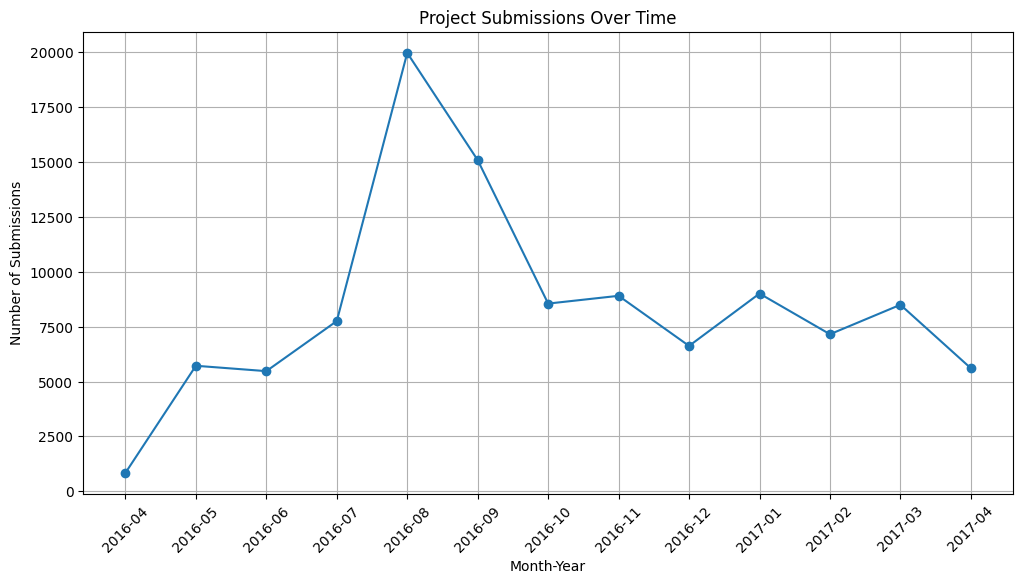

In [28]:
df_time_series = df['project_submitted_datetime'].dt.to_period('M').value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.plot(df_time_series.index.astype(str), df_time_series.values, marker='o')  
plt.xlabel('Month-Year')
plt.ylabel('Number of Submissions')
plt.title('Project Submissions Over Time')
plt.grid()
plt.xticks(rotation=45)
plt.show()

<div style="font-size: 20px; text-align: justify;"><ul><br><br>The projects were submitted between the period April 2016 to April 2017. The highest number of projects (20000) were submitted in the month of August  of 2016 followed by 15000 projects in September 2016. </ul>

<br><br>
</div>

<div style="font-size: 20px; text-align: justify;">c. Column project_subject_categories and sub categories.

<br><br>
</div>

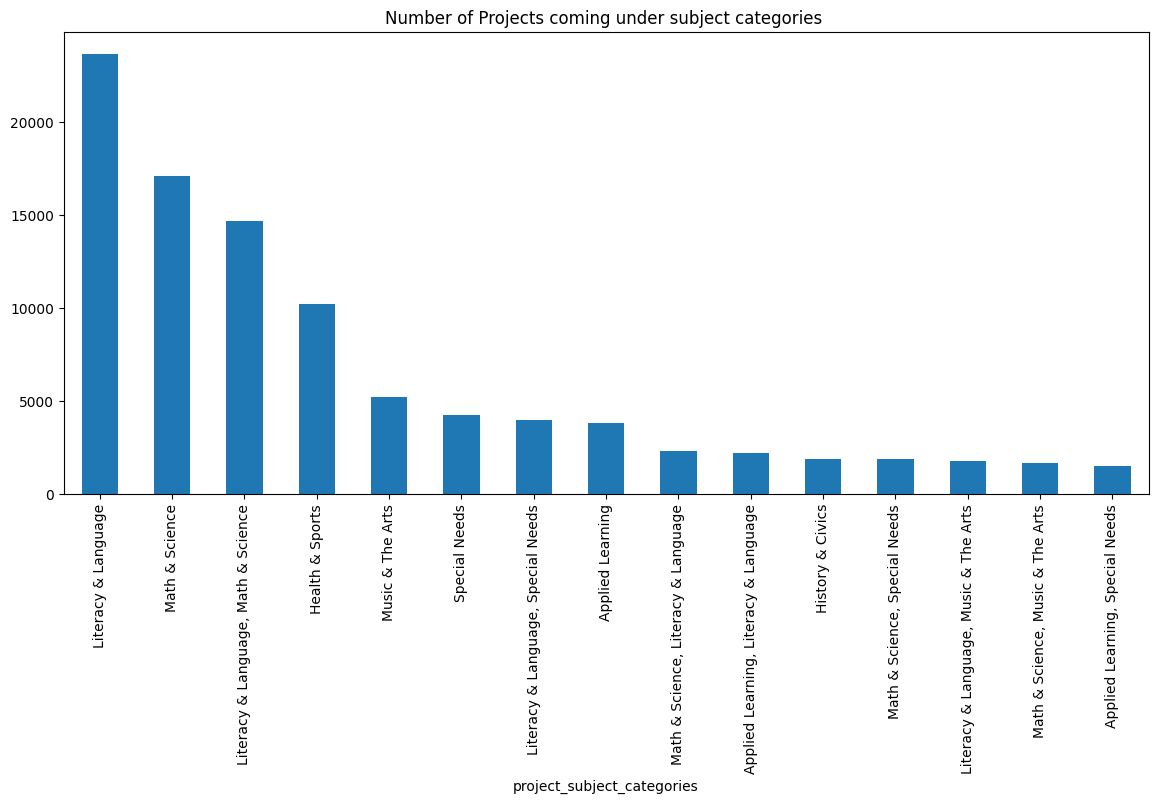

project_subject_categories
Literacy & Language                           21.652570
Math & Science                                15.626831
Literacy & Language, Math & Science           13.397042
Health & Sports                                9.315502
Music & The Arts                               4.741506
Special Needs                                  3.868263
Literacy & Language, Special Needs             3.625696
Applied Learning                               3.451779
Math & Science, Literacy & Language            2.095233
Applied Learning, Literacy & Language          2.005529
History & Civics                               1.694310
Math & Science, Special Needs                  1.684241
Literacy & Language, Music & The Arts          1.608267
Math & Science, Music & The Arts               1.503002
Applied Learning, Special Needs                1.342816
History & Civics, Literacy & Language          1.300710
Health & Sports, Special Needs                 1.273250
Warmth, Care & Hunger

In [29]:
plt.figure(figsize=(14,6))

df.groupby('project_subject_categories').size().sort_values(ascending=False)[:15].plot(kind='bar')
plt.title('Number of Projects coming under subject categories ')
plt.show()
print(df.groupby('project_subject_categories').size().sort_values(ascending=False)/len(df)*100)

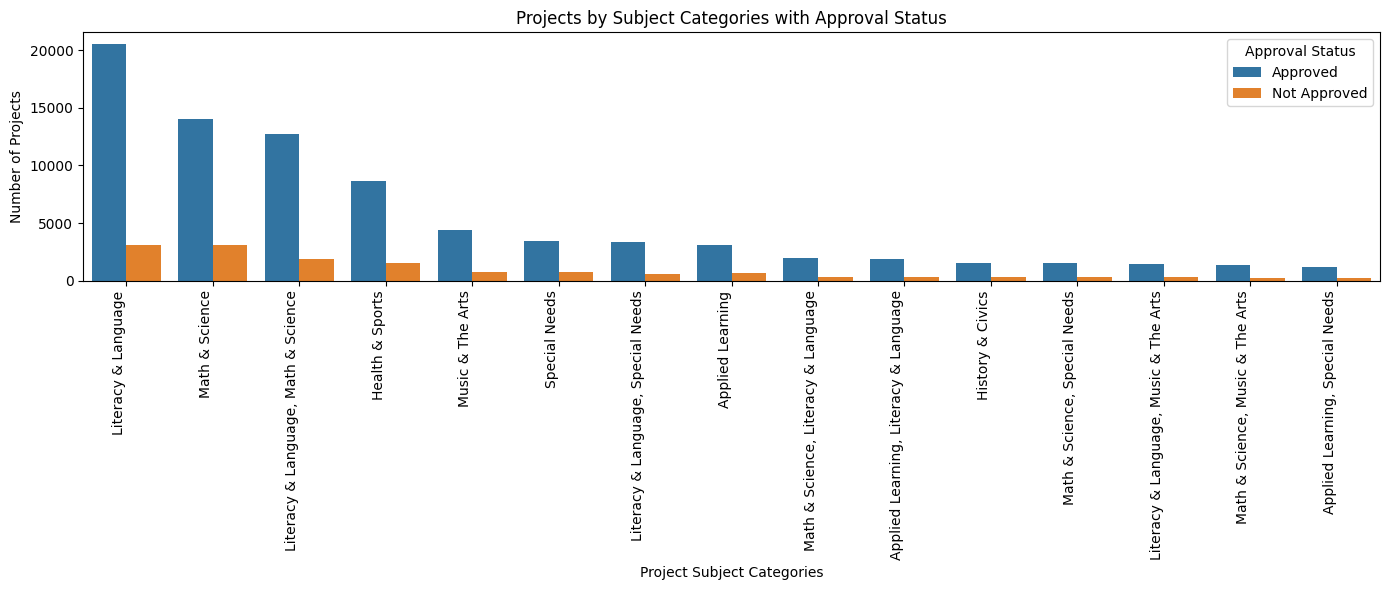

In [30]:

category_counts = df.groupby(['project_subject_categories', 'Approval_Status']).size().reset_index(name='count')

total_counts = df['project_subject_categories'].value_counts()
top_categories = total_counts.index


category_counts = pd.merge(
    category_counts,
    total_counts.reset_index(name='total_count').rename(columns={'index': 'project_subject_categories'}),
    on='project_subject_categories'
)


category_counts = category_counts.sort_values(by='total_count', ascending=False)[:30]


plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_counts,
    x='project_subject_categories',
    y='count',
    hue='Approval_Status',
    order=category_counts['project_subject_categories'].unique()  
)


plt.title('Projects by Subject Categories with Approval Status')
plt.xlabel('Project Subject Categories')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


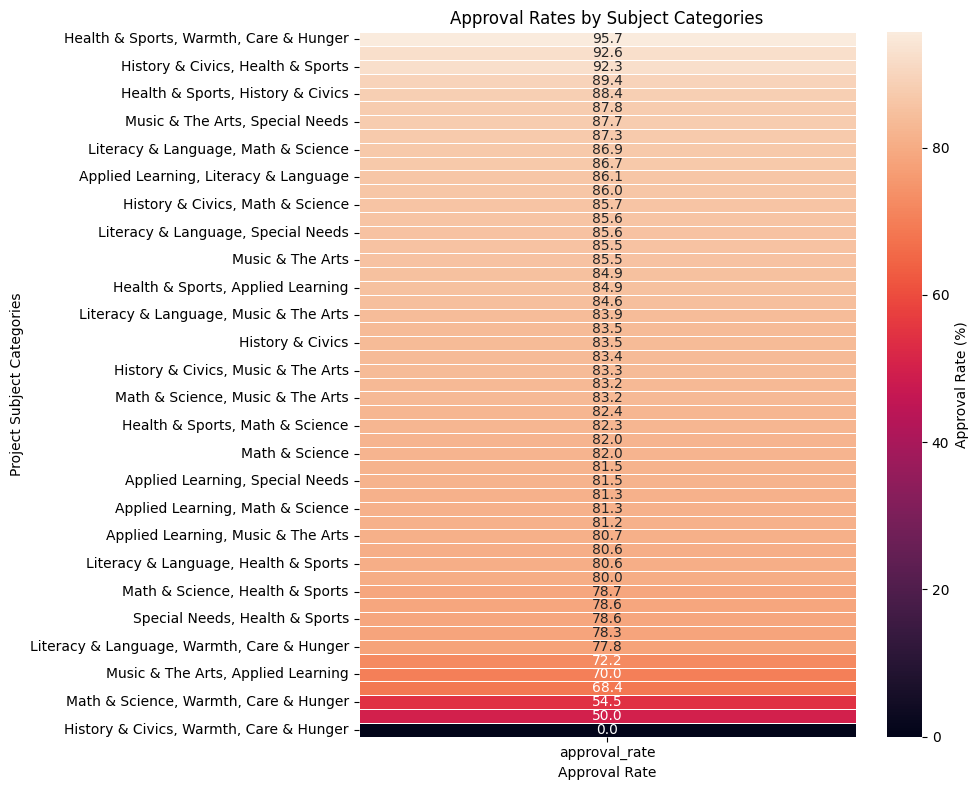

In [31]:

total_counts = df.groupby('project_subject_categories').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('project_subject_categories').size().reset_index(name='approved_count')


approval_stats = pd.merge(total_counts, approved_counts, on='project_subject_categories', how='left')
approval_stats['approved_count'] = approval_stats['approved_count'].fillna(0) 

approval_stats['approval_rate'] = (approval_stats['approved_count'] / approval_stats['total_count']) * 100


approval_stats = approval_stats.sort_values(by='approval_rate', ascending=False)  
heatmap_data = approval_stats.set_index('project_subject_categories')[['approval_rate']]


plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt='.1f',  
    linewidths=0.5,  
    cbar_kws={'label': 'Approval Rate (%)'}  
)

plt.title('Approval Rates by Subject Categories')
plt.ylabel('Project Subject Categories')
plt.xlabel('Approval Rate')
plt.tight_layout()
plt.show()


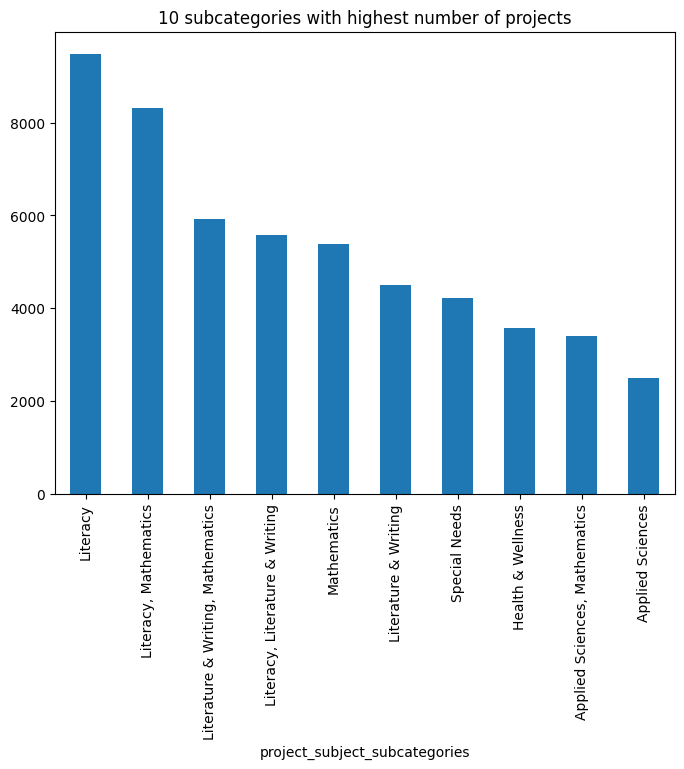

project_subject_subcategories
Literacy                             8.682996
Literacy, Mathematics                7.620277
Literature & Writing, Mathematics    5.421610
Literacy, Literature & Writing       5.099407
Mathematics                          4.923660
Literature & Writing                 4.119984
Special Needs                        3.868263
Health & Wellness                    3.279694
Applied Sciences, Mathematics        3.111270
Applied Sciences                     2.281049
dtype: float64


In [32]:
plt.figure(figsize=(8,6))

df.groupby('project_subject_subcategories').size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('10 subcategories with highest number of projects')
plt.show()
print(df.groupby('project_subject_subcategories').size().sort_values(ascending=False)[:10]/len(df)*100)

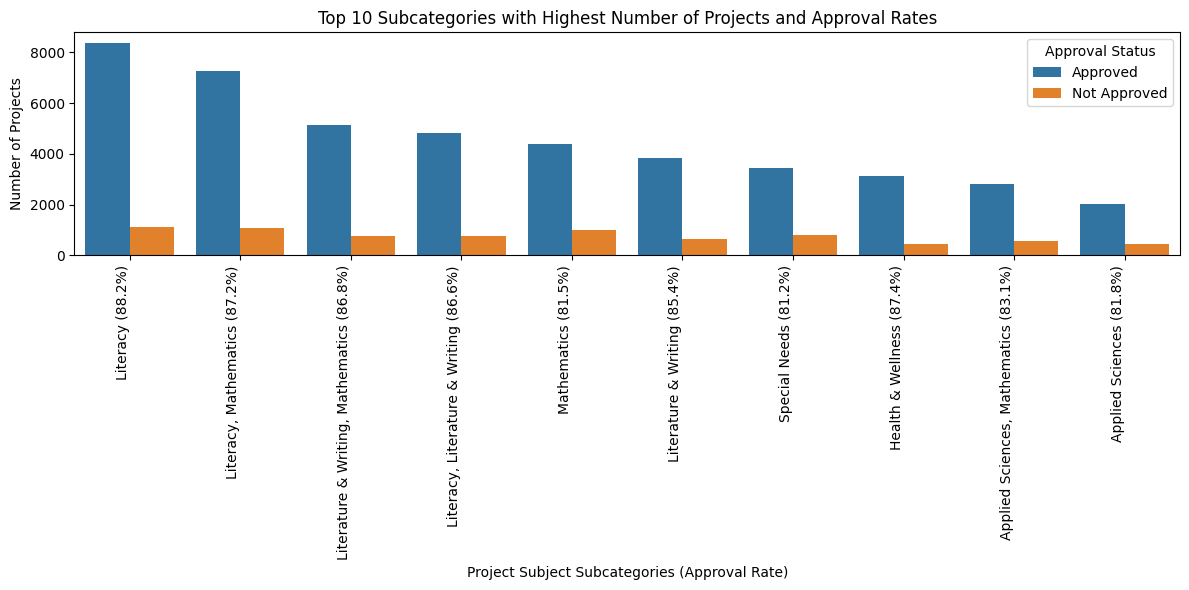

In [33]:
total_counts = df.groupby('project_subject_subcategories').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('project_subject_subcategories').size().reset_index(name='approved_count')

subcategory_stats = pd.merge(total_counts, approved_counts, on='project_subject_subcategories', how='left')
subcategory_stats['approved_count'] = subcategory_stats['approved_count'].fillna(0)

subcategory_stats['approval_rate'] = (subcategory_stats['approved_count'] / subcategory_stats['total_count']) * 100

top_subcategories = subcategory_stats.nlargest(10, 'total_count')

top_subcategories['subcategory_with_rate'] = top_subcategories.apply(
    lambda row: f"{row['project_subject_subcategories']} ({row['approval_rate']:.1f}%)", axis=1
)

subcategory_counts = df.groupby(['project_subject_subcategories', 'Approval_Status']).size().reset_index(name='count')
subcategory_counts = subcategory_counts[subcategory_counts['project_subject_subcategories'].isin(top_subcategories['project_subject_subcategories'])]

subcategory_counts = subcategory_counts.merge(
    top_subcategories[['project_subject_subcategories', 'subcategory_with_rate']],
    on='project_subject_subcategories',
    how='left'
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=subcategory_counts,
    x='subcategory_with_rate',
    y='count',
    hue='Approval_Status',
    order=top_subcategories['subcategory_with_rate']
)


plt.title('Top 10 Subcategories with Highest Number of Projects and Approval Rates')
plt.xlabel('Project Subject Subcategories (Approval Rate)')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


<div style="font-size: 20px; text-align: justify;"><ul><br><br><li> 21% of projects come under category Literacy & Language followed by 15% projects in Math & Science.<br><br>
<li>Subject categories related to Health and Sports like  Health and Sports,Warmth, Care & Hunger  and History & Civics,Health and Sports have Approval rates above 90% whereas ones like Music & The Arts, Warmth, Care & Hunger and History & Civics, Warmth, Care & Hunger have very low approval rates.<br><br>
<li>The most popular subcategory related to Literacy, mathematics, Literature and Applied Sciences. Among the top subcategories, Literacy and Health and wellness have highest approval rates.<br><br>



</ul>

<br><br>
</div>

<div style="font-size: 20px; text-align: justify;">d. Column school state.

<br><br>
</div>

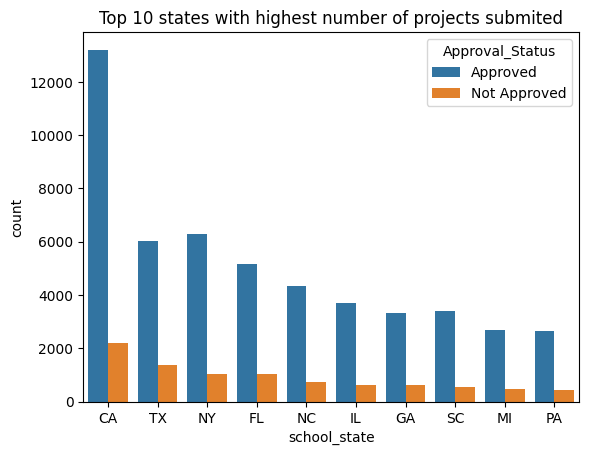

school_state
CA    14.085384
TX     6.769918
NY     6.698521
FL     5.661431
NC     4.660040
IL     3.981766
GA     3.627526
SC     3.602812
MI     2.893417
PA     2.845819
dtype: float64


In [34]:
top_states=df.groupby('school_state').size().sort_values(ascending=False)[:10]
sns.countplot(data=df[df['school_state'].isin(top_states.index)],x='school_state',hue='Approval_Status',order=top_states.index)
plt.title('Top 10 states with highest number of projects submited')
plt.show()
print(df.groupby('school_state').size().sort_values(ascending=False)[:10]/len(df)*100)

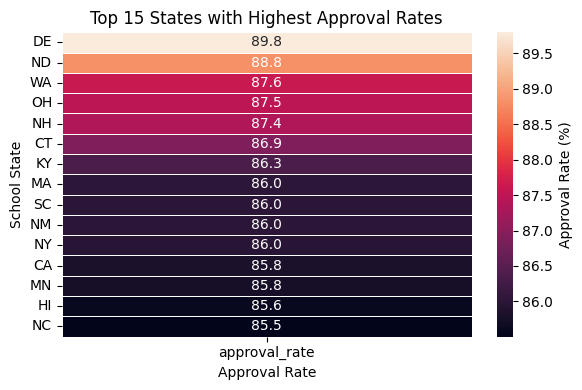

In [35]:
total_counts = df.groupby('school_state').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('school_state').size().reset_index(name='approved_count')

state_stats = pd.merge(total_counts, approved_counts, on='school_state', how='left')
state_stats['approved_count'] = state_stats['approved_count'].fillna(0)

state_stats['approval_rate'] = (state_stats['approved_count'] / state_stats['total_count']) * 100

top_states = state_stats.nlargest(15, 'approval_rate')

heatmap_data = top_states.set_index('school_state')[['approval_rate']]


plt.figure(figsize=(6, 4))
sns.heatmap(
    heatmap_data,
    annot=True,  
    fmt='.1f',   
    linewidths=0.5,
    cbar_kws={'label': 'Approval Rate (%)'}  
)

plt.title('Top 15 States with Highest Approval Rates')
plt.ylabel('School State')
plt.xlabel('Approval Rate')
plt.tight_layout()
plt.show()


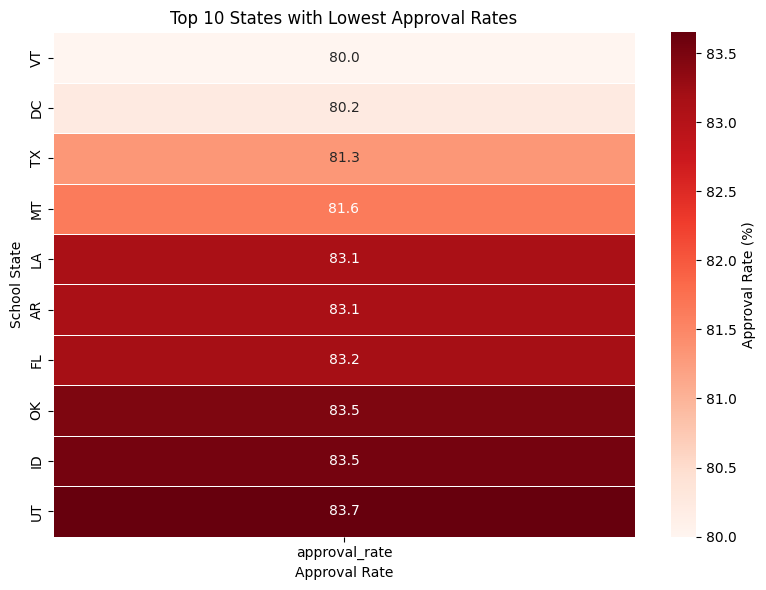

In [36]:
total_counts = df.groupby('school_state').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('school_state').size().reset_index(name='approved_count')

state_stats = pd.merge(total_counts, approved_counts, on='school_state', how='left')
state_stats['approved_count'] = state_stats['approved_count'].fillna(0)

state_stats['approval_rate'] = (state_stats['approved_count'] / state_stats['total_count']) * 100

bottom_states = state_stats.nsmallest(10, 'approval_rate')

heatmap_data = bottom_states.set_index('school_state')[['approval_rate']]
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,  
    fmt='.1f',  
    linewidths=0.5,  
    cmap='Reds',  
    cbar_kws={'label': 'Approval Rate (%)'}  
)

plt.title('Top 10 States with Lowest Approval Rates')
plt.ylabel('School State')
plt.xlabel('Approval Rate')
plt.tight_layout()
plt.show()


<div style="font-size: 20px; text-align: justify;"><ul><br><br><li> 14% of all projects submitted are from state CA. TX and NY has 6% and FL has 5%.<br><br>
<li>DE and ND are the state with highest Approval Rates.<br><br>
<li>Among the top 10 statesa  with highest project submissions, SC and NY has the highest approval rate of 86%.<br><br>
<li>VT and DC are states having lowest approval rates ( below 80%). <br><br>



</ul>

<br><br>
</div>

<div style="font-size: 20px; text-align: justify;">e. Column project_grade_category.

<br><br>
</div>	

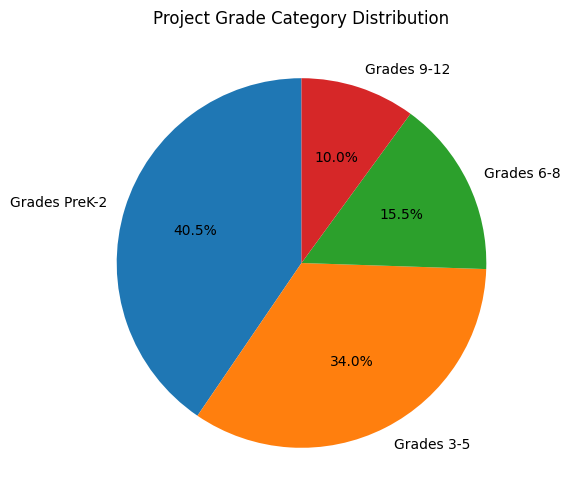

In [37]:
plt.figure(figsize=(8,6))
approval_counts = df['project_grade_category'].value_counts()


plt.pie(x=approval_counts, labels=approval_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Project Grade Category Distribution')
plt.show()


,project_grade_category,total_count,approved_count,approval_rate
0,Grades 3-5,37137,31729,85.437704
3,Grades PreK-2,44225,37536,84.875071
1,Grades 6-8,16923,14258,84.252201
2,Grades 9-12,10963,9183,83.763568


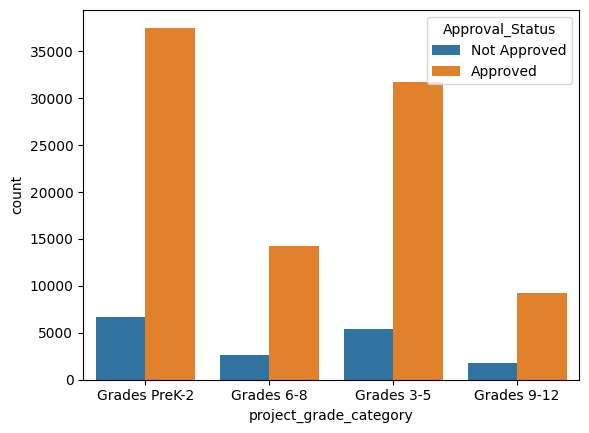

In [38]:
sns.countplot(data=df,x='project_grade_category',hue='Approval_Status')
total_counts = df.groupby('project_grade_category').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('project_grade_category').size().reset_index(name='approved_count')

grade_stats = pd.merge(total_counts, approved_counts, on='project_grade_category', how='left')
grade_stats['approved_count'] = grade_stats['approved_count'].fillna(0)

grade_stats['approval_rate'] = (grade_stats['approved_count'] / grade_stats['total_count']) * 100
grade_stats.sort_values(by='approval_rate',ascending=False)


<div style="font-size: 20px; text-align: justify;"><ul><li>A very low grade of PreK-2 was assigned to 40% of projects. On the other hand, only 10% of total projects grades 9-12.<br><br>
<li>Approval rate is highest for projects with grade 3-5 and lowest for ones with Grade 9-12.<br><br></ul>

<br><br>
</div>	

<div style="font-size: 20px; text-align: justify;">f. Plotting Total Cost of resources.

<br><br>
</div>	

<Axes: ylabel='Total_Cost'>

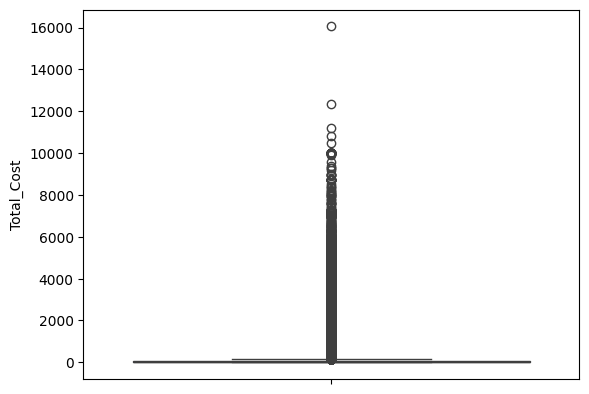

In [39]:
sns.boxplot(res['Total_Cost'])

<div style="font-size: 20px; text-align: justify;"><br><br><ul>We have many outliers in the column 'Total_Cost'</ul>
<br><br>
</div>	

In [40]:
for i in range(0,110,10):
    print(f'{i} th percentile value is {np.percentile(res['Total_Cost'],i)}')

0 th percentile value is 0.0
10 th percentile value is 5.91
20 th percentile value is 8.96
30 th percentile value is 12.6
40 th percentile value is 17.5
50 th percentile value is 25.42
60 th percentile value is 36.18
70 th percentile value is 56.75
80 th percentile value is 99.94999999999999
90 th percentile value is 220.0
100 th percentile value is 16055.939999999999


In [41]:
for i in range(90,101,1):
    print(f'{i} th percentile value is {np.percentile(res['Total_Cost'],i)}')

90 th percentile value is 220.0
91 th percentile value is 249.5
92 th percentile value is 278.84999999999997
93 th percentile value is 301.34
94 th percentile value is 349.98
95 th percentile value is 399.0
96 th percentile value is 469.99
97 th percentile value is 558.0
98 th percentile value is 737.67
99 th percentile value is 1007.96
100 th percentile value is 16055.939999999999


<div style="font-size: 20px; text-align: justify;"><br><br><ul>Replacing the outliers greater than 95 percentile with median.</ul>
<br><br>
</div>	

In [42]:
perc_95 = res['Total_Cost'].quantile(0.95)
median_val = res['Total_Cost'].median()


res['Total_Cost'] = res['Total_Cost'].apply(lambda x: median_val if x > perc_95 else x)

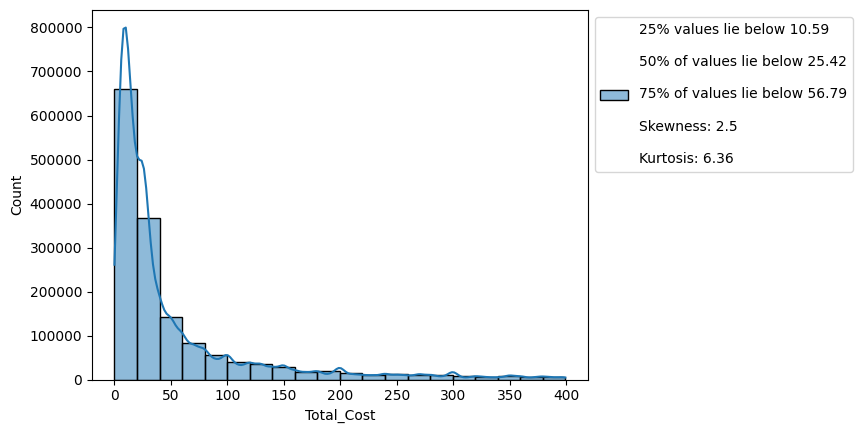

In [43]:
from scipy.stats import skew, kurtosis

sns.histplot(res['Total_Cost'], kde=True,bins=20,
label=f'25% values lie below {round(np.percentile(res['Total_Cost'].dropna(), 25), 2)}\n\n'
f'50% of values lie below {round(np.percentile(res['Total_Cost'].dropna(), 50), 2)}\n\n'
f'75% of values lie below {round(np.percentile(res['Total_Cost'].dropna(), 75), 2)}\n\n'
f'Skewness: {np.round(skew(res['Total_Cost'].dropna()), 2)}\n\n'
f'Kurtosis: {round(kurtosis(res['Total_Cost'].dropna()), 2)}')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

<div style="font-size: 20px; text-align: justify;"><br><br><ul>75% of values in the column Total Cost are less than 57. The column is right skewed indicating that cost of most of the resources comes in the lower price end and fewer items are  in higher price range.</ul>
<br><br>
</div>	 

/tmp/ipykernel_175612/3817840180.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


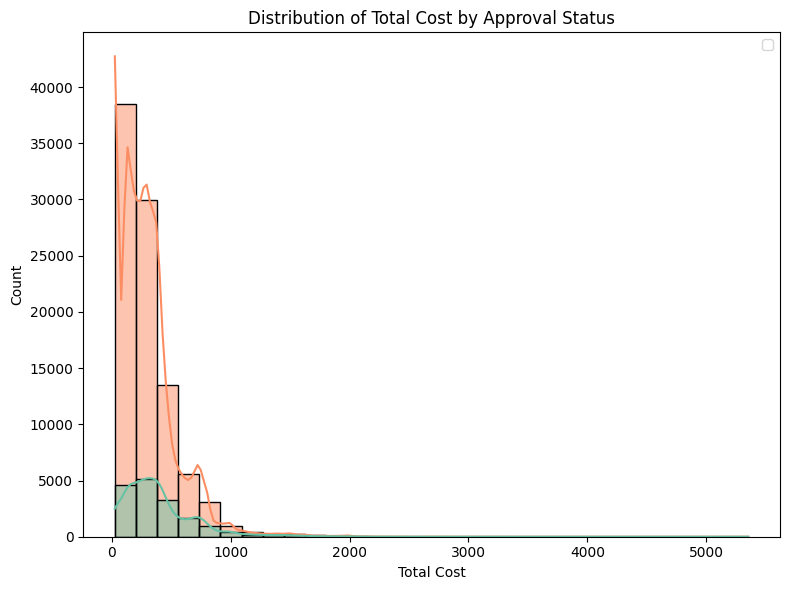

In [44]:
project_costs = res.groupby('id')['Total_Cost'].sum().reset_index()


merged_data = pd.merge(df, project_costs, left_on='id', right_on='id', how='inner')


plt.figure(figsize=(8, 6))


sns.histplot(
    data=merged_data,
    x='Total_Cost',
    hue='Approval_Status',
    bins=30,
    kde=True,
    palette='Set2'
)
plt.title('Distribution of Total Cost by Approval Status')
plt.xlabel('Total Cost')
plt.ylabel('Count')

plt.legend()
plt.tight_layout()
plt.show()


In [45]:
print(f'25% values lie below {round(np.percentile(merged_data['Total_Cost'].dropna(), 25), 2)}\n\n'
f'50% of values lie below {round(np.percentile(merged_data['Total_Cost'].dropna(), 50), 2)}\n\n'
f'75% of values lie below {round(np.percentile(merged_data['Total_Cost'].dropna(), 75), 2)}\n\n'
f'Skewness: {np.round(skew(merged_data['Total_Cost'].dropna()), 2)}\n\n'
f'Kurtosis: {round(kurtosis(merged_data['Total_Cost'].dropna()), 2)}')

25% values lie below 126.79

50% of values lie below 263.46

75% of values lie below 398.98

Skewness: 2.38

Kurtosis: 13.22


<div style="font-size: 20px; text-align: justify;"><br><br><ul><li>By aggregating on project id we can see that Total Cost of 75% of projects lie before 400.<br><br> <li>The data is right skewed indicating that total cost of most of the projects lies at the lower price end and fewer values are at higher price end.<br><br><li>A kurtosis of 13.22 indicates that the distribution has heavy tails and a sharp peak. This shows that the majority of the data is tightly packed around the median, with some projects having exceptionally high costs.</ul>
<br><br>
</div>	 

<div style="font-size: 20px; text-align: justify;"><br><br>g. Analysing date columns.
<br><br>
</div>	

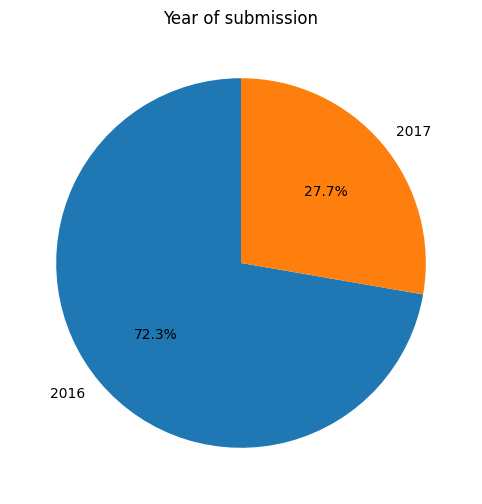

In [46]:
plt.figure(figsize=(8,6))
approval_counts = df['year_of_submission'].value_counts()


plt.pie(x=approval_counts, labels=approval_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Year of submission')
plt.show()


,year_of_submission,total_count,approved_count,approval_rate
1,2017,30282,25874,85.443498
0,2016,78966,66832,84.633893


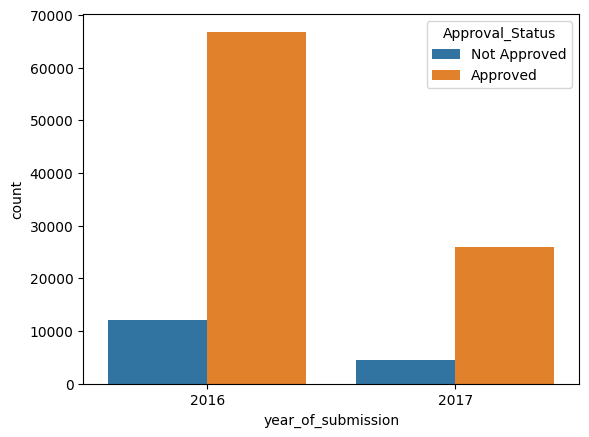

In [47]:
sns.countplot(data=df,x='year_of_submission',hue='Approval_Status')
total_counts = df.groupby('year_of_submission').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('year_of_submission').size().reset_index(name='approved_count')

year_stats = pd.merge(total_counts, approved_counts, on='year_of_submission', how='left')
year_stats['approved_count'] = year_stats['approved_count'].fillna(0)

year_stats['approval_rate'] = (year_stats['approved_count'] / year_stats['total_count']) * 100
year_stats.sort_values(by='approval_rate',ascending=False)


/tmp/ipykernel_175612/2844896347.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby(['month_of_submission', 'Approval_Status']).size().reset_index(name='count')


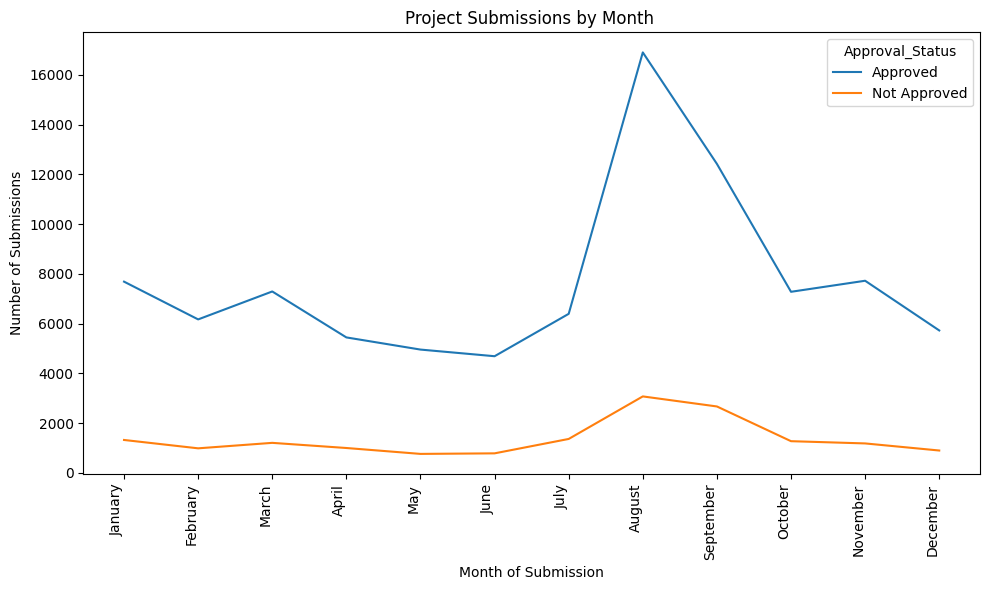

/tmp/ipykernel_175612/2844896347.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('month_of_submission').size().reset_index(name='total_count')
/tmp/ipykernel_175612/2844896347.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('month_of_submission').size().reset_index(name='approved_count')


,month_of_submission,Percentage_of_total,approval_rate
0,January,8.250037,85.310108
1,February,6.552980,86.199190
2,March,7.782293,85.791578
3,April,5.902168,84.475806
4,May,5.237624,86.648025
5,June,5.013364,85.649078
6,July,7.103105,82.409794
7,August,18.288664,84.609610
8,September,13.816271,82.304227
9,October,7.831722,85.098177


In [48]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['month_of_submission'] = pd.Categorical(
    df['month_of_submission'], 
    categories=month_order, 
    ordered=True
)

monthly_counts = df.groupby(['month_of_submission', 'Approval_Status']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_counts,
    x='month_of_submission',
    y='count',
    hue='Approval_Status'
)
plt.title('Project Submissions by Month ')
plt.xlabel('Month of Submission')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

total_counts = df.groupby('month_of_submission').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('month_of_submission').size().reset_index(name='approved_count')

month_stats = pd.merge(total_counts, approved_counts, on='month_of_submission', how='left')
month_stats['approved_count'] = month_stats['approved_count'].fillna(0)

month_stats['approval_rate'] = (month_stats['approved_count'] / month_stats['total_count']) * 100
month_stats['Percentage_of_total']=(month_stats['total_count']/len(df))*100
month_stats[['month_of_submission','Percentage_of_total','approval_rate']]


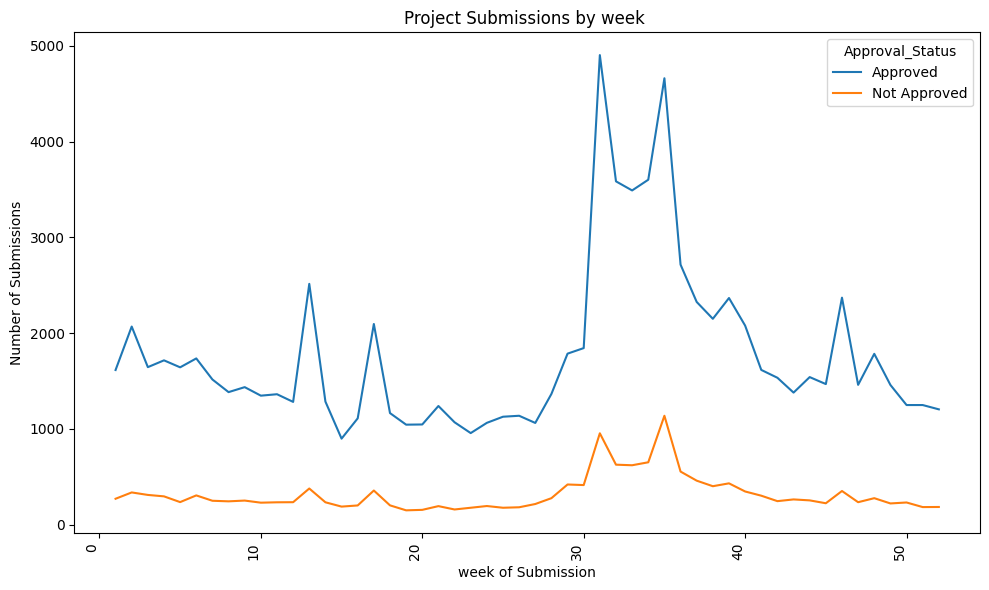

,week_of_submission,Percentage_of_total
30,31,5.361197
34,35,5.307191
33,34,3.892062
31,32,3.853617
32,33,3.761167
35,36,2.991359
12,13,2.645357
38,39,2.559315
36,37,2.547415
45,46,2.489748


In [49]:
week_counts = df.groupby(['week_of_submission', 'Approval_Status']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=week_counts,
    x='week_of_submission',
    y='count',
    hue='Approval_Status'
)
plt.title('Project Submissions by week ')
plt.xlabel('week of Submission')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

total_counts = df.groupby('week_of_submission').size().reset_index(name='total_count')
approved_counts = df[df['Approval_Status'] == 'Approved'].groupby('week_of_submission').size().reset_index(name='approved_count')

week_stats = pd.merge(total_counts, approved_counts, on='week_of_submission', how='left')
week_stats['approved_count'] = week_stats['approved_count'].fillna(0)

week_stats['approval_rate'] = (week_stats['approved_count'] / week_stats['total_count']) * 100
week_stats['Percentage_of_total']=(week_stats['total_count']/len(df))*100
week_stats[['week_of_submission','Percentage_of_total']].sort_values(by='Percentage_of_total',ascending=False)[:10]




<Axes: title={'center': 'Approval Rate by week'}, xlabel='week_of_submission', ylabel='approval_rate'>

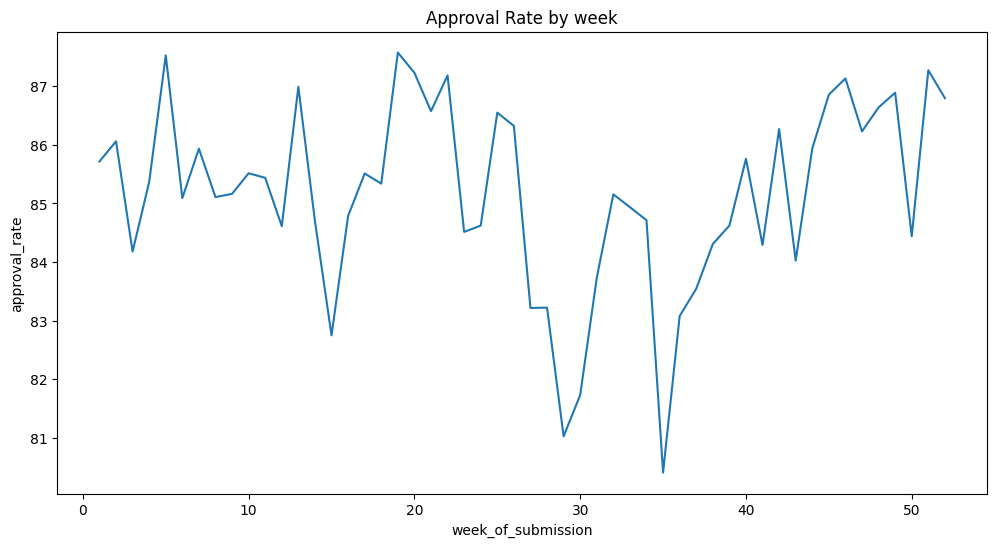

In [50]:

plt.figure(figsize=(12,6))
plt.title('Approval Rate by week')
sns.lineplot(data=week_stats,x='week_of_submission',y='approval_rate')

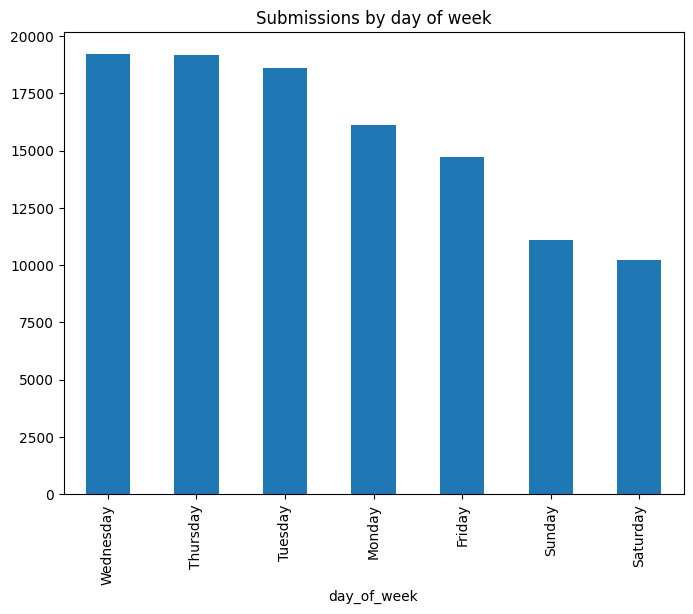

day_of_week
Wednesday    17.592084
Thursday     17.560047
Tuesday      17.052944
Monday       14.771895
Friday       13.484000
Sunday       10.161284
Saturday      9.377746
dtype: float64


In [51]:
plt.figure(figsize=(8,6))

df.groupby('day_of_week').size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Submissions by day of week')
plt.show()
print(df.groupby('day_of_week').size().sort_values(ascending=False)/len(df)*100)

<div style="font-size: 20px; text-align: justify;"><br><br><ul><li>72% projects in the dataset are from year 2016 and rest are from  2017. Projects submitted in 2017 have an approval rate of 85% which is slightly more than that of 2016.<br><br>
<li>18% and 13% of the total number of project submissions are seen in the month of August and September. Very few (5%) are seen in the second quarter of the year.<br><br>
<li>Last and First Quarter of the year especially the months of November December and February have the highest approval rate of 86%. The months September and July has low approval rate of 82% .<br><br>
<li>TThe 31st to 35th week has highets number of submissions in the year. The 18th to 21st week, 4th, 45th and 50th weeks have very high approval rates whereas the 34th , 28th and 29th week has the lowest approval rates.<br><br>
<li>Wednesdays and Thursdays show the highets number of submissions in a week and Sundays and Saturdays have least number of submissions.<br><br>
</ul>
<br><br>
</div>	 

<br><br><div style="font-size: 20px; text-align: justify;">4.  Tokenizing essays and analysing.<br><br>
<ul><br>a. Analysing word length of essays.<br><br>
</ul>
</div>


In [52]:
essay_cols=['project_essay_1','project_essay_2','project_essay_3','project_essay_4']

def num_words(text):
    if pd.isnull(text) or len(text)==0:
        return None
    else:
        return len(text)
    

for i in essay_cols:
    df[f'{i}_count']=df[i].apply(num_words)
    

                 avg_word_length
project_essay_1       664.306999
project_essay_2       834.329132
project_essay_3       562.919372
project_essay_4       355.816392


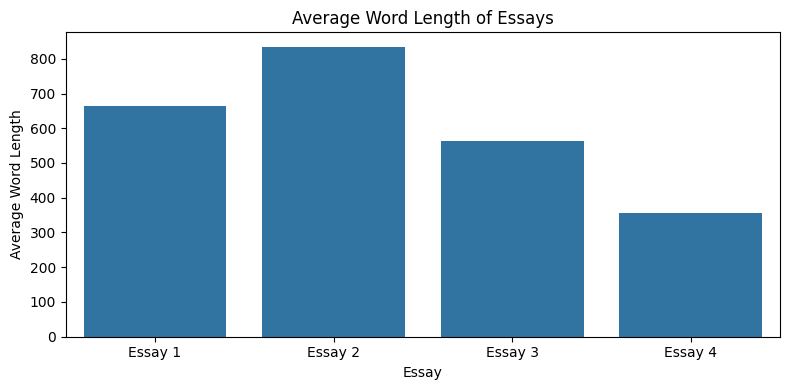

In [53]:

average_word_lengths = {}
for col in essay_cols:
    non_null_counts = df[f'{col}_count'].dropna() 
    if len(non_null_counts) > 0:  
        avg_length = non_null_counts.mean()
    else:
        avg_length = None  
    average_word_lengths[col] = avg_length


average_word_lengths_df = pd.DataFrame.from_dict(average_word_lengths, orient='index', columns=['avg_word_length'])


print(average_word_lengths_df)

plt.figure(figsize=(8, 4))
sns.barplot(x=average_word_lengths_df.index, y=average_word_lengths_df['avg_word_length'])
plt.title('Average Word Length of Essays')
plt.xlabel('Essay')
plt.ylabel('Average Word Length')
plt.xticks(range(len(essay_cols)), ['Essay 1', 'Essay 2', 'Essay 3', 'Essay 4'], rotation=0)
plt.tight_layout()
plt.show()


                 overall_avg  approved_avg  not_approved_avg
project_essay_1   664.306999    664.971965        660.580341
project_essay_2   834.329132    844.022490        780.004836
project_essay_3   562.919372    574.328211        489.259921
project_essay_4   355.816392    359.335280        333.097222


<Figure size 1000x600 with 0 Axes>

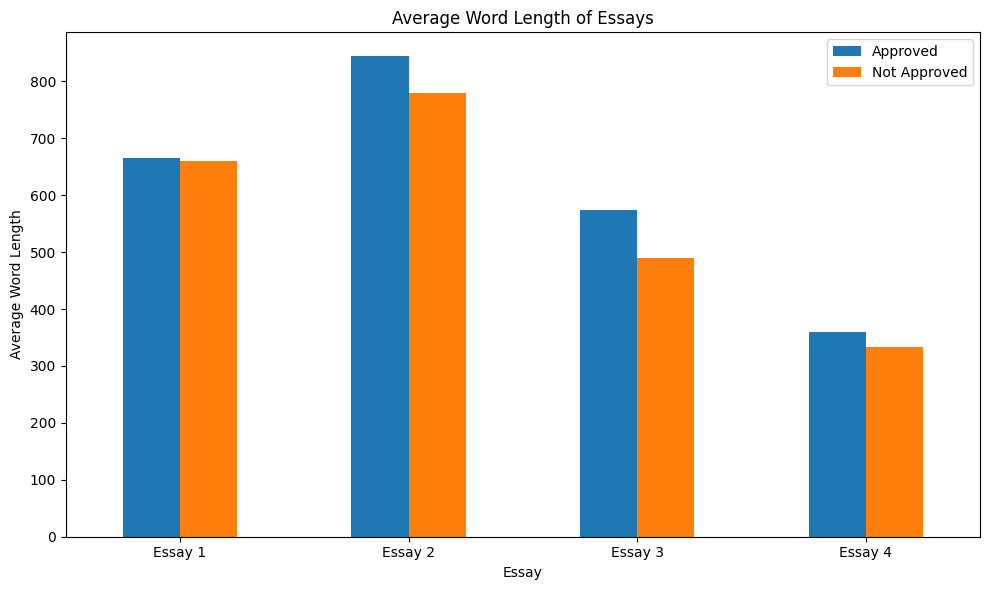

In [54]:

average_word_lengths = {}
approved_word_lengths = {}
not_approved_word_lengths = {}

for col in essay_cols:

    non_null_counts = df[f'{col}_count'].dropna()
    if len(non_null_counts) > 0:
        avg_length = non_null_counts.mean()
    else:
        avg_length = None
    average_word_lengths[col] = avg_length

    approved_counts = df[df['Approval_Status'] == 'Approved'][f'{col}_count'].dropna()
    if len(approved_counts) > 0:
        approved_avg = approved_counts.mean()
    else:
        approved_avg = None
    approved_word_lengths[col] = approved_avg

 
    not_approved_counts = df[df['Approval_Status'] != 'Approved'][f'{col}_count'].dropna()
    if len(not_approved_counts) > 0:
        not_approved_avg = not_approved_counts.mean()
    else:
        not_approved_avg = None
    not_approved_word_lengths[col] = not_approved_avg

overall_avg_df = pd.DataFrame.from_dict(average_word_lengths, orient='index', columns=['overall_avg'])
approved_avg_df = pd.DataFrame.from_dict(approved_word_lengths, orient='index', columns=['approved_avg'])
not_approved_avg_df = pd.DataFrame.from_dict(not_approved_word_lengths, orient='index', columns=['not_approved_avg'])

combined_avg_df = pd.concat([overall_avg_df, approved_avg_df, not_approved_avg_df], axis=1)

print(combined_avg_df)

plt.figure(figsize=(10, 6))
combined_avg_df[['approved_avg','not_approved_avg']].plot(kind='bar', figsize=(10, 6))
plt.title('Average Word Length of Essays' )
plt.xlabel('Essay')
plt.ylabel('Average Word Length')
plt.xticks(range(len(essay_cols)), ['Essay 1', 'Essay 2', 'Essay 3', 'Essay 4'], rotation=0)
plt.legend( ['Approved', 'Not Approved'])
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Essay 4 ')

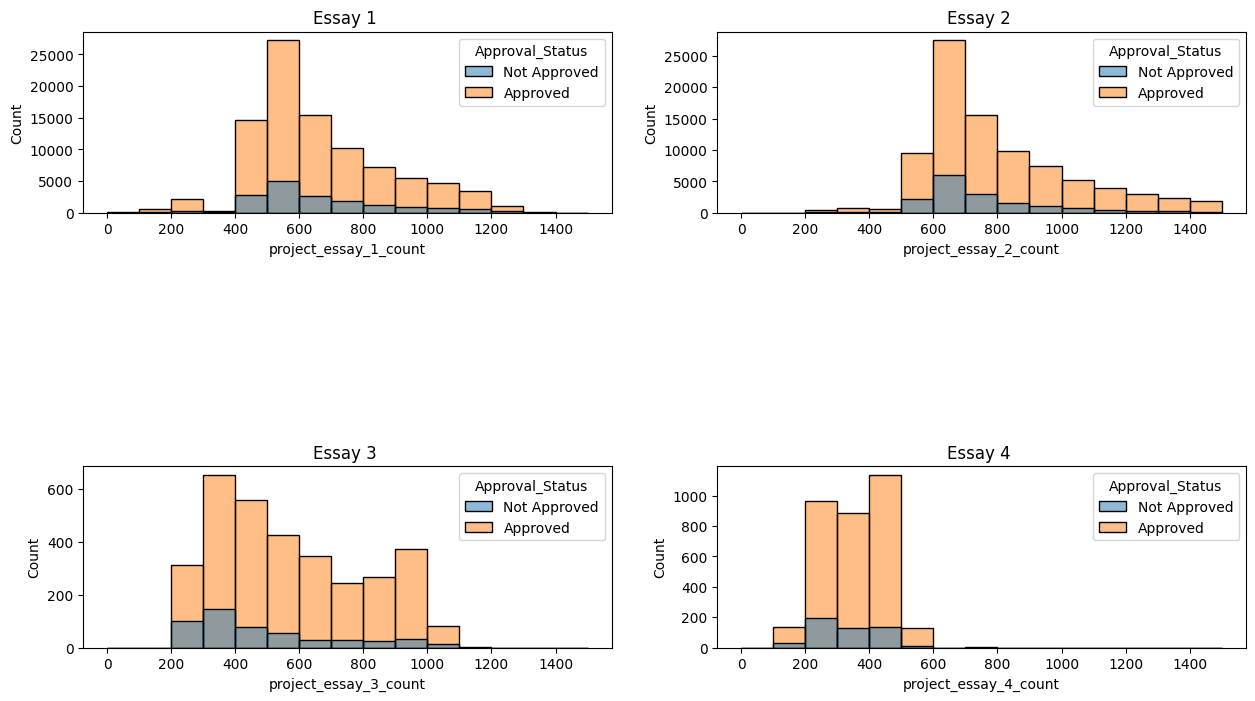

In [55]:
plt.figure(figsize=(15,8))
plt.subplot(3,2,1)
sns.histplot(data=df,x='project_essay_1_count', hue='Approval_Status',bins=list(range(0,1600,100)))
plt.title('Essay 1 ')

plt.subplot(3,2,2)
sns.histplot(data=df,x='project_essay_2_count', hue='Approval_Status',bins=list(range(0,1600,100)))
plt.title('Essay 2 ')

plt.subplot(3,2,5)
sns.histplot(data=df,x='project_essay_3_count', hue='Approval_Status',bins=list(range(0,1600,100)))
plt.title('Essay 3 ')

plt.subplot(3,2,6)
sns.histplot(data=df,x='project_essay_4_count', hue='Approval_Status',bins=list(range(0,1600,100)))
plt.title('Essay 4 ')


<div style="font-size: 20px; text-align: justify;"><br><br><ul><li>After visualizing the average lenth of 4 essays after excluding null values in the column and essays with 0 word length, we can see that Essay_2 has the highest average word lenth of 834 words followed by Essay_1 with 664 words in average. Essay_4 has the least average word count of 335 words.<br><br>
<li>From the graph , it is clear that the average length of approved essays is slightly more than that of not approved ones.<br><br>
<li>From the histograms, we can see that the word count for most essays from Essay_1  lies in the bin 500-600, Essay_2 in the bin 600 to 700. From the non null values of Essay_3 and Essay_4, majority values of project_essay_3 varies from 300 to 1000 words and essay_4 from 200 to 500.<br><br>

</ul>
<br><br>
</div>	 

<br><br><div style="font-size: 20px; text-align: justify;">4.  Tokenizing essays.<br><br>

</div>


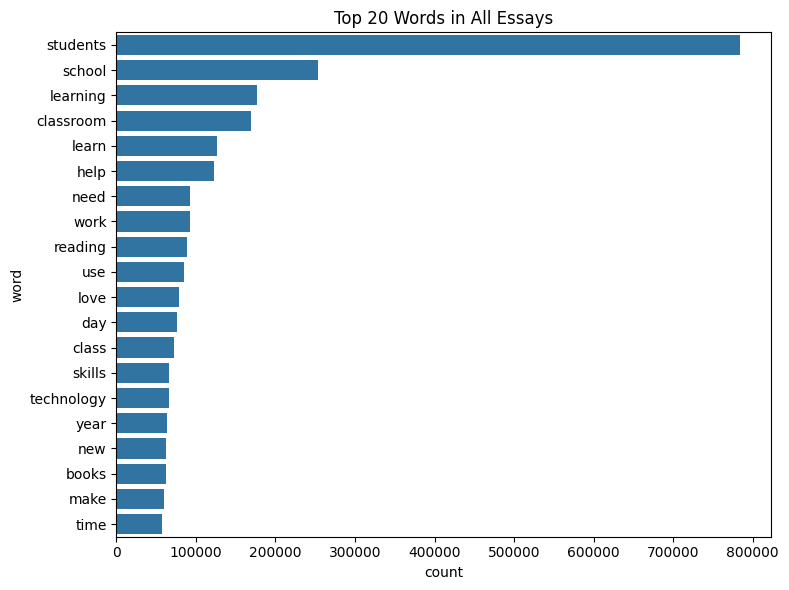

In [56]:
import re
from collections import Counter

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())


stop_words = set(["the", "is", "and", "in", "to", "of", "it", "on", "for", "this", "that", "with","are","they","their","will","our","can","but","would","have","could","who","whose","whom","when","what","these","all","not","many","from","more","them","also","come","want","each","about","able"])  # Add more as needed


def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words and len(word) > 2]


essay_cols = ['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4']
df['all_essays'] = df[essay_cols].fillna('').apply(lambda x: ' '.join(x), axis=1)

approved_essays = ' '.join(df[df['Approval_Status'] == 'Approved']['all_essays'].dropna())
not_approved_essays = ' '.join(df[df['Approval_Status'] != 'Approved']['all_essays'].dropna())
all_essays = ' '.join(df['all_essays'].dropna())


all_tokens = remove_stopwords(tokenize(all_essays))
approved_tokens = remove_stopwords(tokenize(approved_essays))
not_approved_tokens = remove_stopwords(tokenize(not_approved_essays))


all_word_counts = Counter(all_tokens)
approved_word_counts = Counter(approved_tokens)
not_approved_word_counts = Counter(not_approved_tokens)


all_word_df = pd.DataFrame(all_word_counts.most_common(20), columns=['word', 'count'])
approved_word_df = pd.DataFrame(approved_word_counts.most_common(20), columns=['word', 'count'])
not_approved_word_df = pd.DataFrame(not_approved_word_counts.most_common(20), columns=['word', 'count'])


plt.figure(figsize=(8, 6))
sns.barplot(data=all_word_df, x='count', y='word')
plt.title('Top 20 Words in All Essays')
plt.tight_layout()
plt.show()




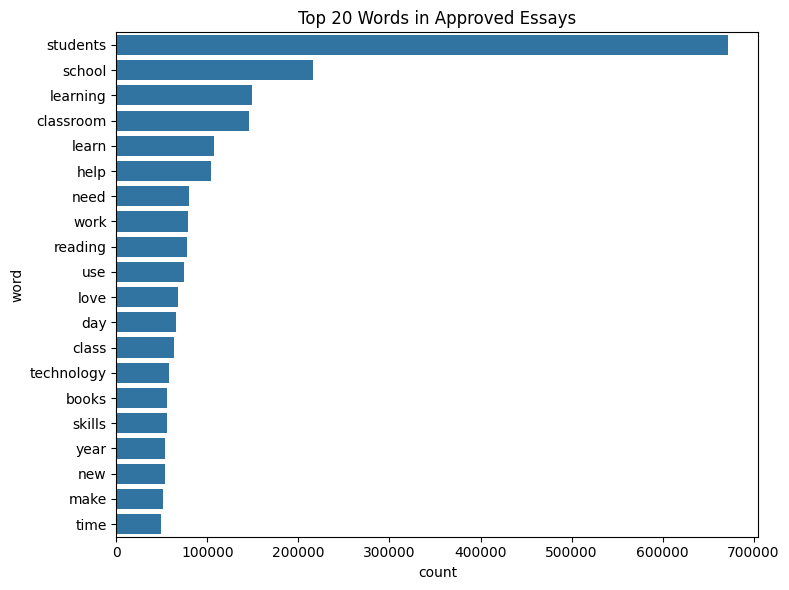

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(data=approved_word_df, x='count', y='word')
plt.title('Top 20 Words in Approved Essays')
plt.tight_layout()
plt.show()

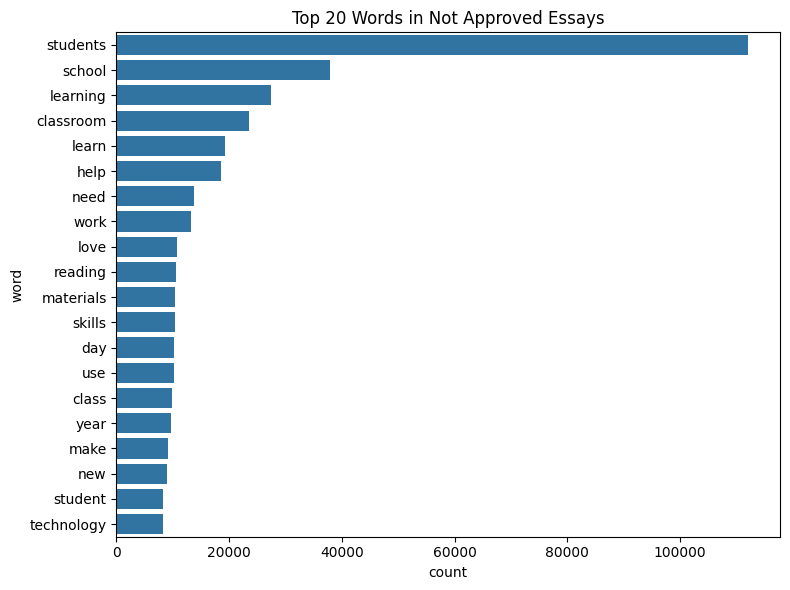

In [58]:

plt.figure(figsize=(8, 6))
sns.barplot(data=not_approved_word_df, x='count', y='word')
plt.title('Top 20 Words in Not Approved Essays')
plt.tight_layout()
plt.show()


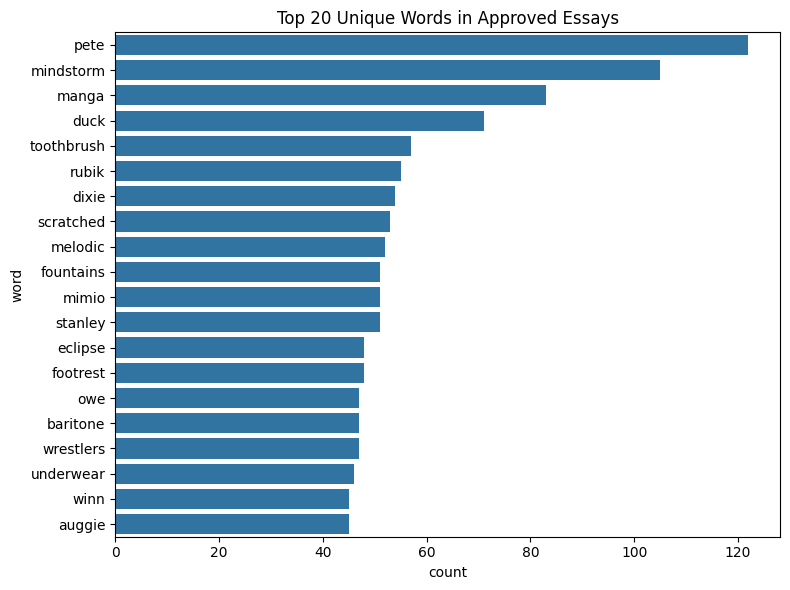

In [59]:
unique_approved_words = set(approved_tokens) - set(not_approved_tokens)


unique_approved_word_counts = {word: count for word, count in approved_word_counts.items() if word in unique_approved_words}

unique_approved_word_df = pd.DataFrame(
    unique_approved_word_counts.items(), columns=['word', 'count']
).sort_values(by='count', ascending=False).head(20)  


plt.figure(figsize=(8, 6))
sns.barplot(data=unique_approved_word_df, x='count', y='word')
plt.title('Top 20 Unique Words in Approved Essays')
plt.tight_layout()
plt.show()


<div style="font-size: 20px; text-align: justify;"><br><br><ul><li>By analysing the words in Approved and Not_approved essays, we understand that the top 9 used words are common for both essays , 'students' being the most common word among both essays.<br><br>
<li>Pete, mindstorm and manga are the common words unique to only approved essays.<br><br>
</ul>
<br><br>
</div>	 

<div style="font-size: 30px; text-align: justify;"><br><br><b><u>Hypothesis Testing<u>
<b></div><br><br>

<div style="font-size: 20px; text-align: justify;"><br><br>1. Association between Project Category and approval status.<br><br>
<ul>Null Hypothesis (H0) : There is no significant association between Project Category and approval status.<br><br>
Alternate Hypothesis (H1) : There is significant association between Project Category and approval status.<br><br>
</ul>
Significance level for the test, alpha=0.05. Applying Chi-square test.


<br><br>
</div>	 

In [60]:

from scipy.stats import chi2_contingency


contingency_table = pd.pivot_table(
    data=df,
  
    columns='Approval_Status',
    index='project_subject_categories',
    aggfunc='size'  
)


contingency_table = contingency_table.fillna(0)

contingency_table



Approval_Status,Approved,Not Approved
project_subject_categories,,
Applied Learning,3072.0,699.0
"Applied Learning, Health & Sports",501.0,107.0
"Applied Learning, History & Civics",146.0,32.0
"Applied Learning, Literacy & Language",1887.0,304.0
"Applied Learning, Math & Science",855.0,197.0
"Applied Learning, Music & The Arts",612.0,146.0
"Applied Learning, Special Needs",1195.0,272.0
"Applied Learning, Warmth, Care & Hunger",8.0,2.0
Health & Sports,8640.0,1537.0


In [61]:
stats,pvalue,dof,expectedresult= chi2_contingency(contingency_table)

print(f'P value : {pvalue}\n\n\n')


if pvalue<0.05:
    print('There is significant association between Project Category and approval status\n\n\n')
else: 
    print('There is no significant association between Project Category and approval status\n\n\n')

P value : 5.942141163769452e-78



There is significant association between Project Category and approval status





<div style="font-size: 20px; text-align: justify;"><br><br><br><br>2. Association between Teacher experience and Approval status.<br><br>
<ul>Null Hypothesis (H0) : There is no significant association between Teacher experience and Approval status.<br><br>
Alternate Hypothesis (H1) : There is significant association between Teacher experience and Approval status.<br><br>
</ul>
Significance level for the test, alpha=0.05. Applying t-test.


<br><br>
</div>	 

In [62]:

from scipy.stats import ttest_ind


inexperienced_teachers = df[df['teacher_number_of_previously_posted_projects'] == 0]
experienced_teachers = df[df['teacher_number_of_previously_posted_projects'] > 0]


inexperienced_approval_rates = inexperienced_teachers['project_is_approved']
experienced_approval_rates = experienced_teachers['project_is_approved']


t_stat, p_value = ttest_ind(inexperienced_approval_rates, experienced_approval_rates, equal_var=False)


print(f"P-value : {p_value}\n\n")



if p_value < 0.05:
    print("There is a statistically significant difference in approval status between first-time and experienced teachers.")
else:
    print("There is no statistically significant difference in approval status between first-time and experienced teachers.")


P-value : 1.3666581964182323e-49


There is a statistically significant difference in approval status between first-time and experienced teachers.


<div style="font-size: 20px; text-align: justify;"><br><br><br><br>3. Association between project cost and approval status.<br><br>
<ul>Null Hypothesis (H0) : There is no significant association between project cost and approval status.<br><br>
Alternate Hypothesis (H1) : There is significant association between project cost and approval status.<br><br>
</ul>
Significance level for the test, alpha=0.05. Applying Pearson correlation.


<br><br>
</div>	 

In [63]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(merged_data['Total_Cost'], merged_data['project_is_approved'])


print(f"Correlation Coefficient: {correlation:.4f}\n\n")
print(f"P-value: {p_value:.4f}\n\n")


if p_value < 0.05:
    print("There is a statistically significant correlation between project cost and approval status.\n\n")
else:
    print("There is no statistically significant correlation between project cost and approval status.\n\n")




Correlation Coefficient: -0.1405


P-value: 0.0000


There is a statistically significant correlation between project cost and approval status.




<div style="font-size: 20px; text-align: justify;"><br><br><br><br>4. Association between essay lengths and approval status.<br><br>
<ul>Null Hypothesis (H0) : There is no significant association between essay lengths  and approval status.<br><br>
Alternate Hypothesis (H1) : There is significant association between essay lengths and approval status.<br><br>
</ul>
Significance level for the test, alpha=0.05. Applying t-test.


<br><br>
</div>	 

In [64]:

from scipy.stats import ttest_ind


df['total_essay_length'] = (
    df[['project_essay_1_count', 'project_essay_2_count', 'project_essay_3_count', 'project_essay_4_count']]
    .fillna(0)
    .sum(axis=1)
)


approved_essays = df[df['Approval_Status'] == 'Approved']['total_essay_length']
not_approved_essays = df[df['Approval_Status'] != 'Approved']['total_essay_length']


t_stat, p_value = ttest_ind(approved_essays, not_approved_essays, equal_var=False)


print(f"T-statistic: {t_stat:.4f}\n\n")
print(f"P-value: {p_value:.4f}\n\n")


if p_value < 0.05:
    print("There is a statistically significant difference in essay lengths between approved and not approved projects.")
else:
    print("There is no statistically significant difference in essay lengths between approved and not approved projects.")


T-statistic: 24.1309


P-value: 0.0000


There is a statistically significant difference in essay lengths between approved and not approved projects.


<div style="font-size: 20px; text-align: justify;"><br><br><br><br>5. Association between resource categories and approval status.<br><br>
<ul>Null Hypothesis (H0) : There is no significant association between resource categories  and approval status.<br><br>
Alternate Hypothesis (H1) : There is significant association between resource categories and approval status.<br><br>
</ul>
Significance level for the test, alpha=0.05. Applying Chi-square test.


<br><br>
</div>	 

In [65]:
from scipy.stats import chi2_contingency


def categorize_resource(description):
    if not isinstance(description, str):  
        return "Unknown"
    
    description = description.lower()  

    if any(keyword in description for keyword in ["technology", "laptop", "tablet", "computer", "chromebook", "projector", "printer"]):
        return "Technology"
    elif any(keyword in description for keyword in ["book", "novel", "literature", "reading", "dictionary", "library"]):
        return "Books"
    elif any(keyword in description for keyword in ["supplies", "pencil", "marker", "pen", "stationery", "notebook", "eraser", "folder"]):
        return "Supplies"
    elif any(keyword in description for keyword in ["sport", "equipment", "ball", "soccer", "basketball", "physical", "fitness", "gym", "outdoor"]):
        return "Sports"
    elif any(keyword in description for keyword in ["art", "craft", "paint", "brush", "drawing", "canvas", "scissors", "color"]):
        return "Art & Crafts"
    elif any(keyword in description for keyword in ["science", "experiment", "lab", "microscope", "stem", "biology", "chemistry", "physics","math", "geometry", "algebra", "calculator", "ruler", "measurement", "fractions"]):
        return "Maths & Science"
    elif any(keyword in description for keyword in ["music", "instrument", "piano", "guitar", "drum", "band", "choir", "violin","song"]):
        return "Music"

    elif any(keyword in description for keyword in ["health", "hygiene", "sanitizer", "mask", "wellness", "nutrition", "food"]):
        return "Health"
    elif any(keyword in description for keyword in ["furniture", "desk", "chair", "table", "storage", "rack"]):
        return "Furniture"
    else:
        return "Other"



res['Resource_Category'] = res['description'].apply(categorize_resource)



resources_summary = res.groupby(['id', 'Resource_Category'])['Total_Cost'].sum().reset_index()


res_cat_merge = pd.merge(df, resources_summary, on='id', how='inner')


contingency_table = pd.crosstab(res_cat_merge['Resource_Category'], res_cat_merge['Approval_Status'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)



print(f"Chi-Square Statistic: {chi2:.4f}\n\n")
print(f"P-value: {p_value:.4f}\n\n")





if p_value < 0.05:
    print("There is a statistically significant relationship between resource categories and project approval status.")
else:
    print("There is no statistically significant relationship between resource categories and project approval status.")


Chi-Square Statistic: 1061.6310


P-value: 0.0000


There is a statistically significant relationship between resource categories and project approval status.
